# ESS 5010 Assignment 3 Outline

Michael Stewart, SN: 214693626


## Abstract

Characteristics includes:
- Brightness
- Centroid X
- Centroid Y
- Scale (STD)- PSF
- Motion Vector X
- Motion Vector Y
- Background 
    


### Step 1

- Open up the CSV Files and access data within.
- Create a Cube of data such that each layer represents 1 csv file.
- Average all layers and export as .csv file for investigation as to parameters


In [1]:
#Shows how to open one file
import csv
import numpy as np
blank_matrix=[]
with open('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/0.csv',newline='') as csvfile:
    file=csv.reader(csvfile,delimiter=' ',quotechar='|')
    blank_matrix=np.array(file)
    
r=np.genfromtxt('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/0.csv',delimiter=',',dtype=None)

#for x in range (0,maxCSV_num+1):
    


In [2]:
print(np.shape(r))

(256, 256)


In [3]:
csv_num_lim=235;

In [4]:
#Change the file name every iteration
for i in range(0,csv_num_lim):
    filename=('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/'+str(i)+'.csv')
print(filename)

D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/234.csv


In [5]:
#Change the name and add it to a 3D matrix
import numpy as np
img_data=[]
label_data=[]
for i in range(0,csv_num_lim):
    img_filename=('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/'+str(i)+'.csv')
    img_data.append(np.genfromtxt(img_filename,delimiter=',',dtype=None))
    label_filename=('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/labels/'+str(i)+'.csv')
    label_data.append(np.genfromtxt(label_filename,delimiter=',',dtype=None))
img_data=np.array(img_data);
label_data=np.array(label_data);

In [6]:
print(np.shape(img_data))
print(np.shape(label_data))

(235, 256, 256)
(235, 256, 256)


In [7]:
#Average over axis and Export
mean_label_data=np.mean(label_data,axis=0)

#Write csv File
np.savetxt('label_means.csv',mean_label_data,delimiter=',')

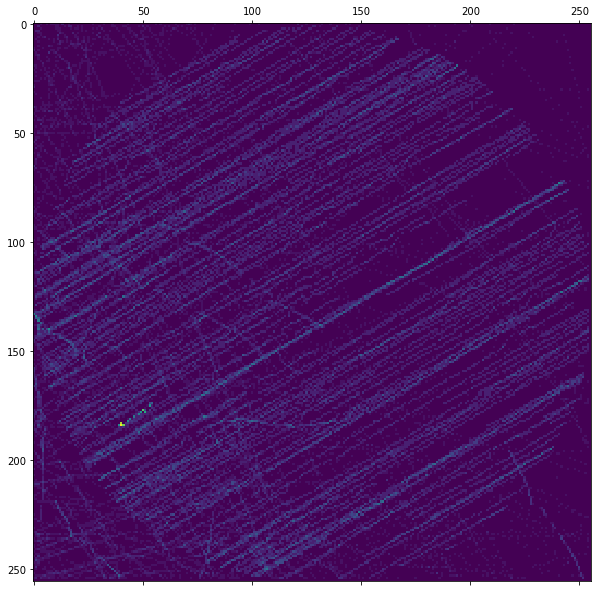

In [9]:
#Plot labels in 3D
import matplotlib.pyplot as plt
plt.matshow(mean_label_data)
plt.show()
plt.rcParams["figure.figsize"]=(20,20)


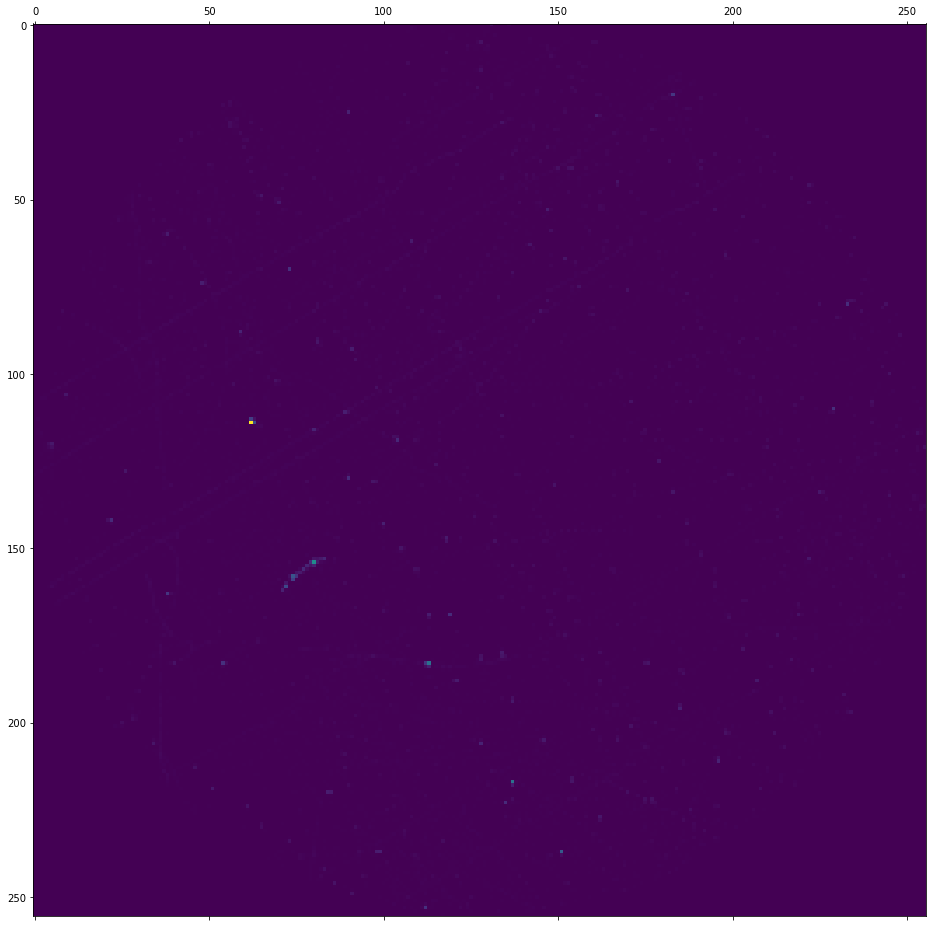

In [10]:
#Plot Image Data
mean_img_data=np.mean(img_data,axis=0)
plt.matshow(mean_img_data)
plt.show()
plt.rcParams["figure.figsize"]=(20,20)